Auto MPG – Linear Regression Project

Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Step 2: Load Dataset

In [2]:
df = pd.read_csv("auto-mpg.csv")

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Step 3: Check Dataset Info

In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    str    
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    str    
dtypes: float64(3), int64(4), str(2)
memory usage: 28.1 KB


Step 4: Data Cleaning (Dataset ထဲမှာ horsepower column မှာ "?" ပါမပါ)

In [4]:
# Replace ? with NaN
df['horsepower'] = df['horsepower'].replace('?', np.nan)

# Convert to numeric
df['horsepower'] = pd.to_numeric(df['horsepower'])

# Drop missing values
df = df.dropna()

df.info()

<class 'pandas.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    str    
dtypes: float64(4), int64(4), str(1)
memory usage: 30.6 KB


Step 5: Select Features (X) and Target (y)

MPG ကို predict လုပ်မှာဖြစ်တဲ့အတွက်

Target (y) → mpg
Features (X) → engine & weight related columns

In [5]:
X = df[['cylinders', 'displacement', 'horsepower', 
        'weight', 'acceleration', 'model year']]

y = df['mpg']

Step 6: Train-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Step 7: Train Linear Regression Model

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Step 8: Make Predictions

In [8]:
y_pred = model.predict(X_test)

results = pd.DataFrame({
    "Actual MPG": y_test,
    "Predicted MPG": y_pred
})

results.head()

,Actual MPG,Predicted MPG
79,26.0,25.932796
276,21.6,26.299279
248,36.1,32.965489
56,26.0,26.854430
393,27.0,29.453726


Step 9: Evaluate Model

R² Score 0.7+ ရရင် model ကကောင်းတယ်လို့ ပြောနိုင်

In [9]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Absolute Error: 2.503860089776125
Mean Squared Error: 10.502370329417303
R2 Score: 0.7942349075428591


Step 10: Visualization (2D Plot) Actual vs Predicted

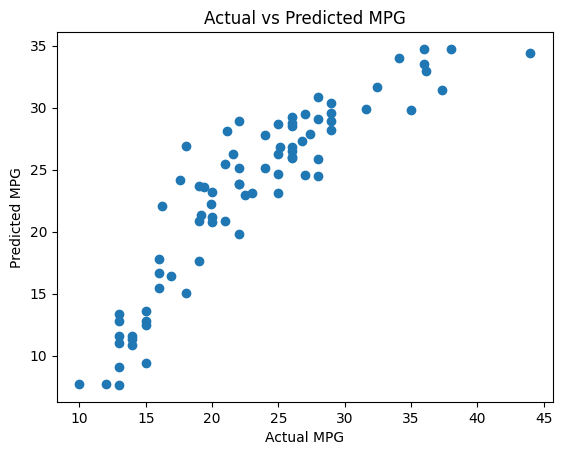

In [10]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.show()

Weight vs MPG (2D Visualization)

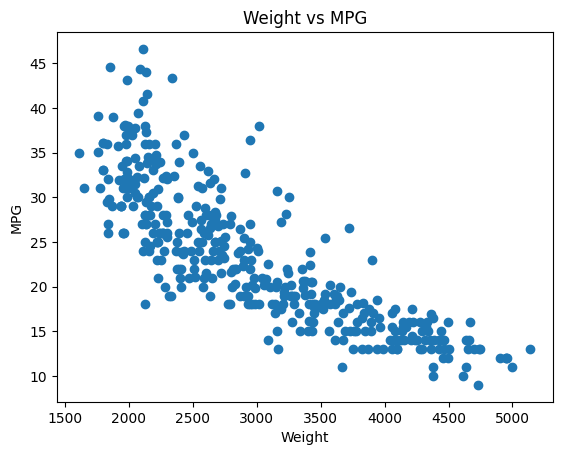

In [11]:
plt.scatter(df['weight'], df['mpg'])
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.title("Weight vs MPG")
plt.show()